In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pylab as plt
import numpy as np

In [2]:
##Parameters for generating the cluster data.

##Consider changing these after you've looked through the rest of the notebook
n_samples = 100 ##Changing this will change the number of instances
n_clusters = 3 ##Changing this will change the true number of clusters.  Keep less than 8 for the plotting colors
random_state = 8 ##Changing this will generate a different dataset with the same parameters

##Don't change!
n_features = 2 ##Don't change this so we can easily visualize it in 2-d!

In [3]:
##Plotting helper function
def plot_clustering_data( X , r , cluster_centers , title ):
    cluster_colors = [ 'blue' , 'purple' , 'gray' , 'green' , 'yellow' , 'brown' , 'cyan' , 'pink' ]
    legend = []
    for cluster_idx in range( len( cluster_centers ) ):

        cluster_X = X[ np.where( r == cluster_idx )[ 0 ] , : ]
        plt.scatter( cluster_X[ : , 0 ] , cluster_X[ : , 1 ] , color=cluster_colors[ cluster_idx ] )

        legend.append( 'Cluster ' + str( cluster_idx ) )

    plt.scatter( cluster_centers[ : , 0 ] , cluster_centers[ : , 1 ] , color='orange' , marker='x' )
    legend.append( 'Centers' )

    plt.legend( legend )
    plt.xlabel( 'Feature X0' )
    plt.ylabel( 'Feature X1' )
    plt.title( title )

    plt.show()

## Q1: Do the true clusters in the dataset make sense?  Do you think it would be easy for an algorithm to find them?

The figure below shows the dataset we'll use for training our algorithm and the true clusters used to generate the data.

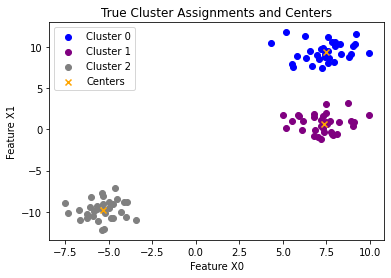

In [17]:
##generates and plots the ground truth data
X , true_r , true_mu = datasets.make_blobs( n_samples=n_samples , n_features=n_features , centers=n_clusters , 
                                           return_centers=True , random_state=random_state )

plot_clustering_data( X , true_r , true_mu , 'True Cluster Assignments and Centers' )

## Q2: How would you decide which cluster each instance should belong to if you knew the true centers?

The figure below shows the true cluster centers with randomly generated cluster assignments.  You don't need to come up with a full algorithm, just think through what you might do at a high level.

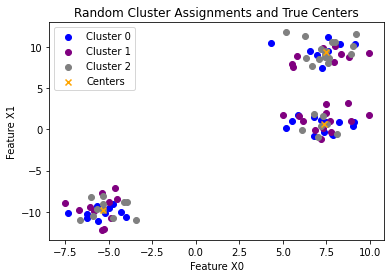

In [18]:
plot_clustering_data( X , np.random.choice( n_clusters , n_samples ) , true_mu , 'Random Cluster Assignments and True Centers' )


## Q3: How would you decide where the cluster centers should be if you knew the true cluster assignments?

The figure below shows the true cluster assignments with randomly generated cluster centers.  You don't need to come up with a full algorithm, just think through what you might do at a high level.

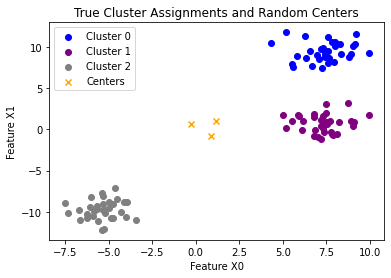

In [19]:
plot_clustering_data( X , true_r , np.random.randn( true_mu.shape[ 0 ] , true_mu.shape[ 1 ] ) , 'True Cluster Assignments and Random Centers' )


## Q4:  Does KMeans always learn the same solution?  What does that mean about the optimization problem?

The code below fits clusters using the KMeans algorithm on the true data.  Each plot shows that for a different random initialization of the KMeans algorithm.

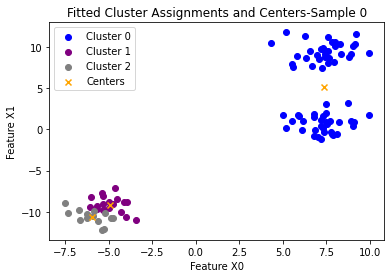

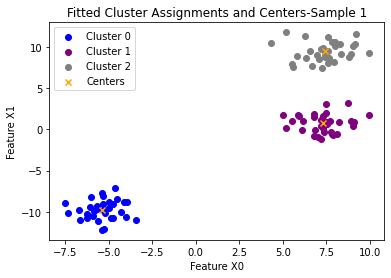

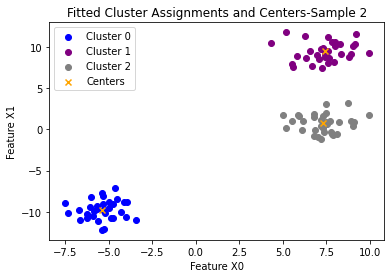

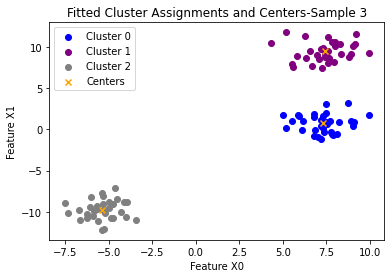

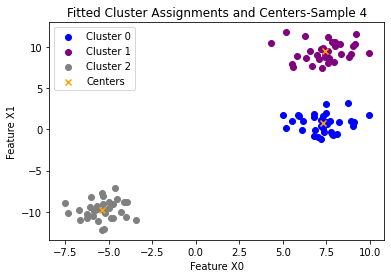

In [5]:
n_clusters_to_fit = n_clusters ##What happens when this matches the true number of clusters?  What if it doesn't?
n_times_to_refit = 5 ##Number of times to refit KMeans with different random seeds

##Fit Kmeans cluster on the data and see what comes out
for random_seed in range( n_times_to_refit ):
    kmeans = KMeans( n_clusters=n_clusters_to_fit , init='random' , n_init=1 , random_state=random_seed )

    kmeans.fit( X )

    fitted_mu = kmeans.cluster_centers_
    fitted_r = kmeans.predict( X )

    plot_clustering_data( X , fitted_r , fitted_mu , 'Fitted Cluster Assignments and Centers-Sample ' + str( random_seed ) )

In [6]:
##Helper code to see how it fits over a series of update steps
def plot_kmeans_fitting_over_n_steps( X , n_steps , init='random' ):
    fitted_mu = init
    for i in range( n_steps ):
        kmeans = KMeans( n_clusters=n_clusters_to_fit , init=fitted_mu , n_init=1 , random_state=random_seed , max_iter=1 )
        kmeans.fit( X )
        fitted_mu = kmeans.cluster_centers_
        fitted_r = kmeans.predict( X )
        plot_clustering_data( X , fitted_r , fitted_mu , 'Fitting Cluster Assignments and Centers - Step ' + str( i+1 ) )

    

## Q5:  How many steps does it take for the algorithm to converge?  How can you tell it has converged?

The code below shows a series of plots corresponding to each training step in the KMeans algorithm.

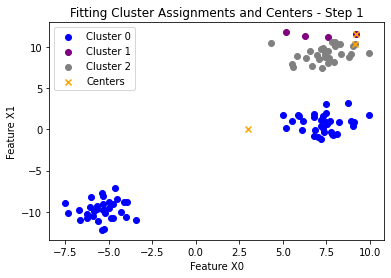

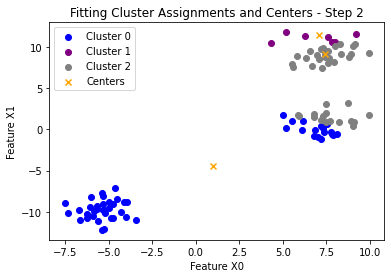

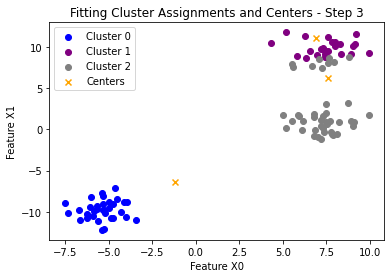

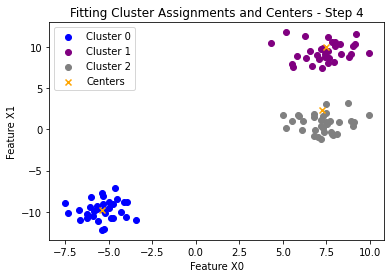

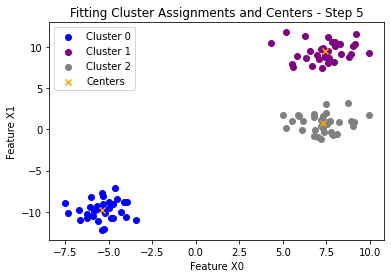

In [20]:
##Fitting KMeans 1 step at a time
random_seed = 4
n_steps = 5

initial_mu = np.zeros( ( n_clusters , n_features ) )
plot_kmeans_fitting_over_n_steps( X , n_steps , init=initial_mu )
                     

## Additional Exercises: 

- Try changing the parameters used to generate the data in box 2
- Change the number of clusters used in the KMeans algorithm by setting: n_clusters_to_fit. What happens when this doesn't match the true number of clusters?
- Try different initializations of the KMeans algorithm by setting: initial_mu